# Heliocentric Model and Geocentric Model

## Construct <code>planets_dict</code>

### Planet Info
* [Mercury](https://solarsystem.nasa.gov/planets/mercury/in-depth/)
* [Venus](https://solarsystem.nasa.gov/planets/venus/in-depth/)
* [Mars](https://solarsystem.nasa.gov/planets/mars/overview/)
* [Jupiter](https://solarsystem.nasa.gov/planets/jupiter/overview/)

* Year: Earth days
* R: astronomical units away from the Sun
* You can change the "color" in the dictionary to one of the following color label.
    * 'b':blue
    * 'g':green
    * 'r':red
    * 'c':cyan
    * 'm':magenta
    * 'y':yellow
    * 'k':black

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

planets_dict={  "Earth":
                  {"Year": 365,
                   "R": 1,
                   "color": "b"},
                "Mercury":
                  {"Year": 88,
                   "R": 0.4,
                   "color": "g"},
                "Venus":
                  {"Year": 225,
                   "R": 0.7,
                   "color": "r"},
                "Mars":
                  {"Year": 687,
                   "R": 1.52,
                   "color": "c"
                  },
                "Jupiter":
                  {"Year": 4333,
                   "R": 5.2,
                   "color": "m"
                  },
             }

def show_two_planets(name1 = "Earth", name2 = "Mercury"):
    fig, ax = plt.subplots(figsize=(6,6), dpi=100)
    L = max(planets_dict[name1]["R"],  planets_dict[name2]["R"])+0.1
    ax = plt.axis([-L, L, -L,L])
    plt.title(name1+" and "+name2)
    plt.xlabel("x (AU)")
    plt.ylabel("y (AU)")
    Dot1, = plt.plot([], [], planets_dict[name1]["color"]+'o' , label=name1)
    Dot2, = plt.plot([], [], planets_dict[name2]["color"]+'x',  label=name2)
    plt.legend()
    def animate(i):

        rot1 = 2*np.pi*i/(planets_dict[name1]["Year"])
        Dot1.set_data(planets_dict[name1]["R"]*np.cos(rot1), planets_dict[name1]["R"]*np.sin(rot1))
        rot2 = 2*np.pi*i/(planets_dict[name2]["Year"])
        Dot2.set_data(planets_dict[name2]["R"]*np.cos(rot2), planets_dict[name2]["R"]*np.sin(rot2))
    
        return Dot1, Dot2

    # create animation using the animate() function
    maxYear = max(planets_dict[name1]["Year"], planets_dict[name2]["Year"])
    myAnimation = animation.FuncAnimation(fig, func = animate, frames=np.arange(0.0, maxYear, maxYear/100), \
                                      interval=50, blit=True, repeat=False)
    plt.close()
    return myAnimation

def show_all_planets():
    keys = planets_dict.keys()
#     fig = plt.figure()
    fig, ax = plt.subplots(figsize=(6,6), dpi=100)
    L = []
    for i in keys:
        L.append(planets_dict[i]["R"])
    L = max(L)+0.1
    ax = plt.axis([-L, L, -L,L])
    plt.title("Heliocentric Model")
    plt.xlabel("x (AU)")
    plt.ylabel("y (AU)")
    D = []
    for i in keys:
        Dot1, = plt.plot([], [], planets_dict[i]["color"]+'o' , label=i)
        D.append(Dot1)
    plt.legend()
    def animate(i):
        cnt = 0
        for j in keys:
            rot1 = 2*np.pi*i/(planets_dict[j]["Year"])
            D[cnt].set_data(planets_dict[j]["R"]*np.cos(rot1), planets_dict[j]["R"]*np.sin(rot1))
            cnt = cnt + 1
        return D

    # create animation using the animate() function
    maxYear = []
    for i in keys:
        maxYear.append(planets_dict[i]["Year"])
    maxYear = max(maxYear)
    myAnimation = animation.FuncAnimation(fig, func = animate, frames=np.arange(0.0, maxYear, maxYear/100), \
                                      interval=100, blit=True, repeat=False)
    plt.close()
    return myAnimation


## Self-defined Simulator Function
<code>show_all_planets()</code>: start the planetary orbit simulator

<code>show_two_planets(name1, name2)</code>: start the planetary orbit simulator with only two planets

In [2]:
myAnimation = show_all_planets()
HTML(myAnimation.to_html5_video())
# myAnimation.save('HeliocentricModel.gif', writer='imagemagick', fps=30)

In [3]:
anima = show_two_planets("Earth", "Mercury")
HTML(anima.to_html5_video())

In [4]:
from IPython.display import clear_output
from tqdm import tqdm 
def plot(Dot1x, Dot1y, Dot2x, Dot2y, Diffx, Diffy):
        """Plot the training progresses."""
        clear_output(True)
        
        plt.figure(figsize=(10, 10))
        ax1 = plt.subplot(221)
        ax1.set_xlim([-2, 2])
        ax1.set_ylim([-2, 2])
        plt.scatter(Dot1x[-1], Dot1y[-1])
        plt.scatter(Dot2x[-1], Dot2y[-1])
        
        plt.subplot(222)
        plt.plot(Diffx)
        
        plt.subplot(223)
        plt.plot(Diffy)
        
        plt.subplot(224)
        plt.plot(Diffx, Diffy)
        
        plt.show()

def process(days=365, step=1, planet1_name="Earth", planet2_name="Mercury", plot_show=True):
    Dot1x = []
    Dot1y = []
    Dot2x = []
    Dot2y = []
    Diffx = []
    Diffy = []
    for ind in tqdm(range(0,days,step)):
        rot1 = 2*np.pi*ind/(planets_dict[planet1_name]["Year"])
        x1 = planets_dict[planet1_name]["R"]*np.cos(rot1)
        y1 = planets_dict[planet1_name]["R"]*np.sin(rot1)
        Dot1x.append(x1)
        Dot1y.append(y1)
        
        rot2 = 2*np.pi*ind/(planets_dict[planet2_name]["Year"])
        x2 = planets_dict[planet2_name]["R"]*np.cos(rot2)
        y2 = planets_dict[planet2_name]["R"]*np.sin(rot2)
        Dot2x.append(x2)
        Dot2y.append(y2)
        Diffx.append(x2-x1)
        Diffy.append(y2-y1)
        if(plot_show):
            plot(Dot1x, Dot1y, Dot2x, Dot2y, Diffx, Diffy)
    return Dot1x, Dot1y, Dot2x, Dot2y, Diffx, Diffy

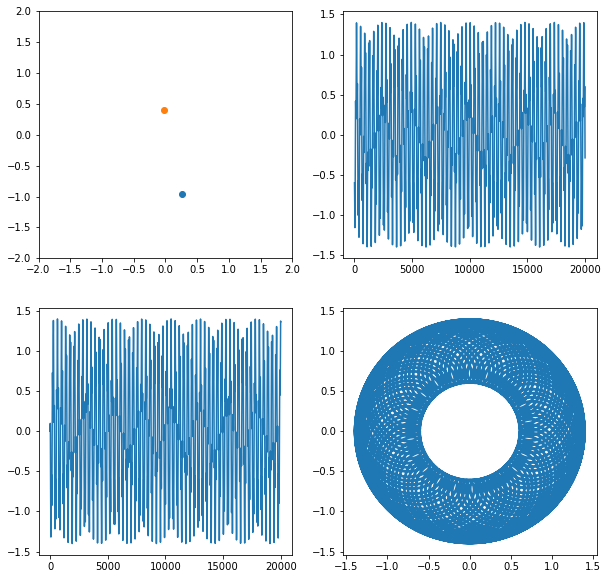

In [5]:
data = process(20000,1,"Earth","Mercury",False)
print(type(data))
plot(data[0], data[1], data[2], data[3], data[4], data[5])

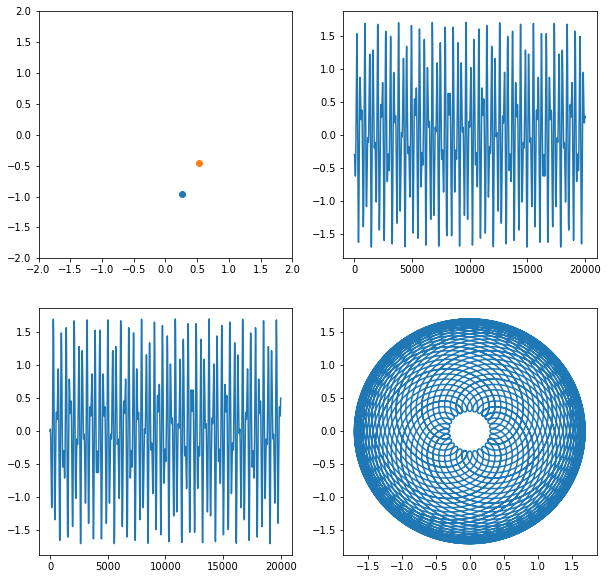

In [6]:
data = process(20000,1,"Earth","Venus",False)
print(type(data))
plot(data[0], data[1], data[2], data[3], data[4], data[5])

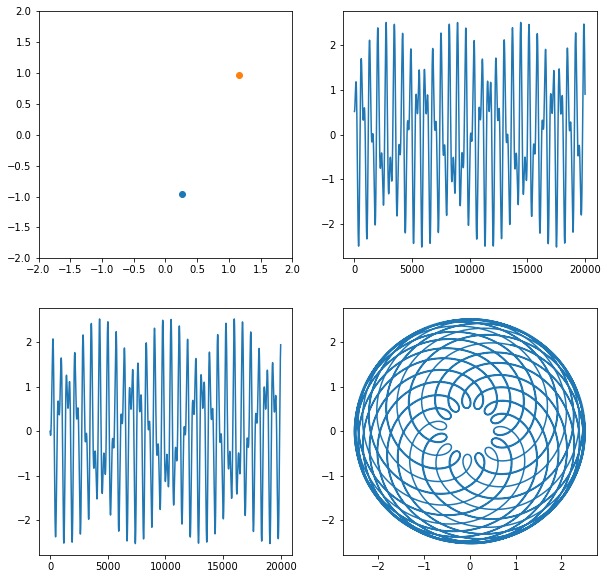

In [7]:
data = process(20000,1,"Earth","Mars",False)
print(type(data))
plot(data[0], data[1], data[2], data[3], data[4], data[5])

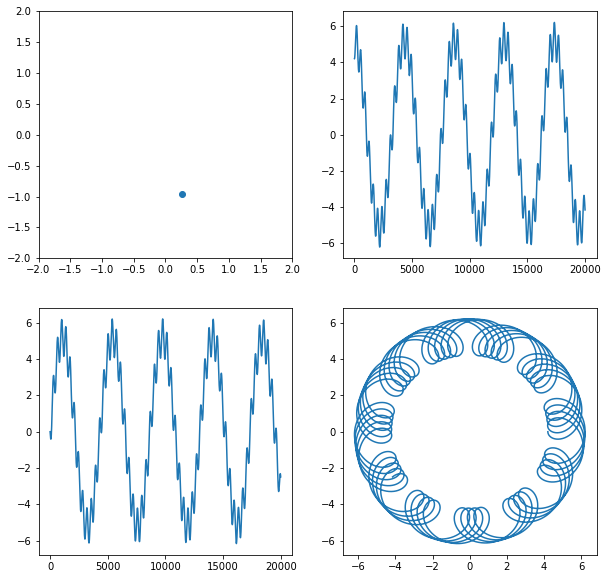

In [8]:
data = process(20000,1,"Earth","Jupiter",False)
print(type(data))
plot(data[0], data[1], data[2], data[3], data[4], data[5])

# Geocentric Model

100%|█████████████████████████████████████████████| 20000/20000 [00:00<00:00, 206738.68it/s]


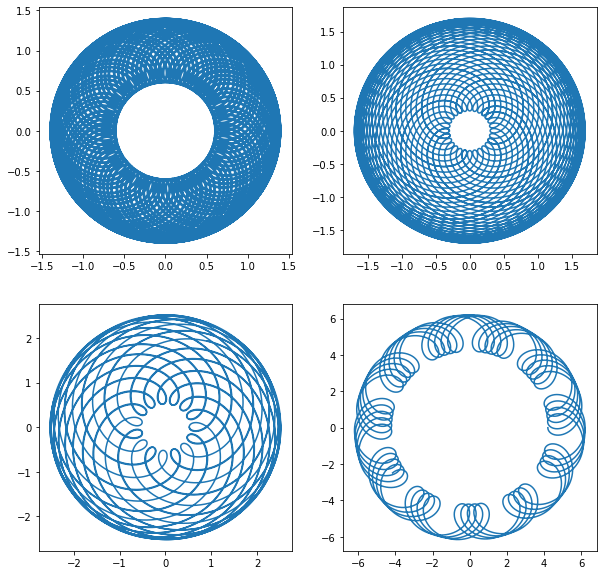

In [9]:
data1 = process(20000,1,"Earth","Mercury",False)
data2 = process(20000,1,"Earth","Venus",False)
data3 = process(20000,1,"Earth","Mars",False)
data4 = process(20000,1,"Earth","Jupiter",False)
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(data1[-2], data1[-1])
        
plt.subplot(222)
plt.plot(data2[-2], data2[-1])
        
plt.subplot(223)
plt.plot(data3[-2], data3[-1])
        
plt.subplot(224)
plt.plot(data4[-2], data4[-1])
        
plt.show()

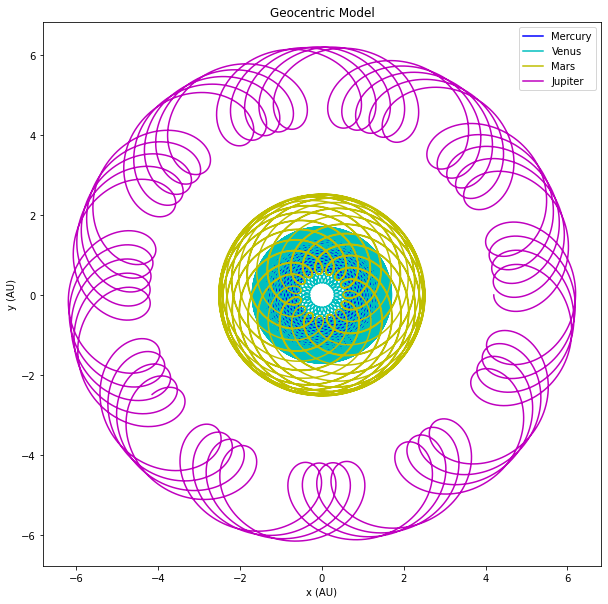

In [10]:
plt.figure(figsize=(10, 10))
plt.plot(data1[-2], data1[-1], 'b' ,label="Mercury")
plt.plot(data2[-2], data2[-1], 'c',label="Venus")
plt.plot(data3[-2], data3[-1], 'y',label="Mars")
plt.plot(data4[-2], data4[-1], 'm',label="Jupiter")
plt.legend()
plt.title("Geocentric Model")
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.show()

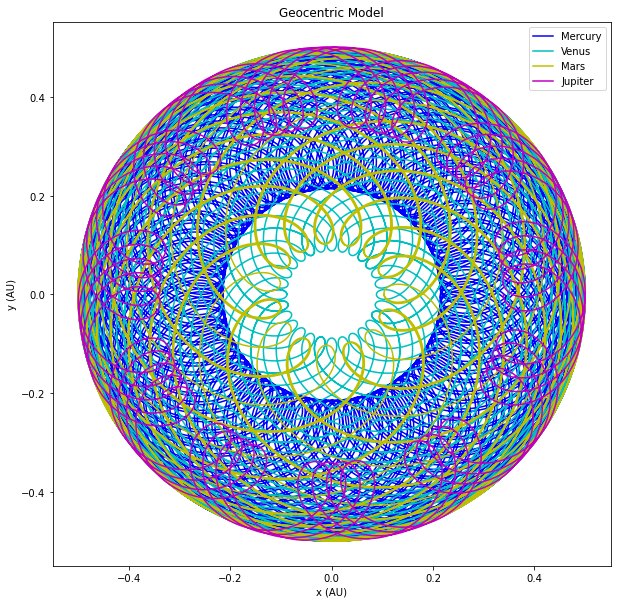

In [27]:
def maxsubmin(lst): 
    return max(lst)-min(lst)
avg =maxsubmin(data1[-2])
tmp = [i/avg for i in data1[-2]]
data1x = tmp

avg =maxsubmin(data1[-1])
tmp = [i/avg for i in data1[-1]]
data1y = tmp

avg =maxsubmin(data2[-2])
tmp = [i/avg for i in data2[-2]]
data2x = tmp

avg =maxsubmin(data2[-1])
tmp = [i/avg for i in data2[-1]]
data2y = tmp

avg =maxsubmin(data3[-2])
tmp = [i/avg for i in data3[-2]]
data3x = tmp

avg =maxsubmin(data3[-1])
tmp = [i/avg for i in data3[-1]]
data3y = tmp

avg =maxsubmin(data4[-2])
tmp = [i/avg for i in data4[-2]]
data4x = tmp

avg =maxsubmin(data4[-1])
tmp = [i/avg for i in data4[-1]]
data4y = tmp
plt.figure(figsize=(10, 10))
plt.plot(data1x, data1y, 'b' ,label="Mercury")
plt.plot(data2x, data2y, 'c',label="Venus")
plt.plot(data3x, data3y, 'y',label="Mars")
plt.plot(data4x, data4y, 'm',label="Jupiter")
plt.legend()
plt.title("Geocentric Model")
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.show()